<a href="https://colab.research.google.com/github/hws2002/Deep_Learning_with_Keras/blob/main/Chapter5/Chapter5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 적당한 모델 크기 찾기

In [4]:
from tensorflow.keras.datasets import imdb
import numpy as np
(train_data, train_labels) , _ = imdb.load_data(num_words = 10000)

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros( (len(sequences), dimension))
  for i , sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
train_data = vectorize_sequences(train_data)

In [7]:
import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid"),
])

model.compile(
    optimizer = "rmsprop",
    loss = "binary_crossentropy",
    metrics = ['accuracy']
)
history_original = model.fit(train_data, train_labels, epochs = 20, batch_size = 512, validation_split = .4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.7117 - loss: 0.6006 - val_accuracy: 0.8715 - val_loss: 0.4039
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8966 - loss: 0.3497 - val_accuracy: 0.8872 - val_loss: 0.3171
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9154 - loss: 0.2594 - val_accuracy: 0.8877 - val_loss: 0.2885
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9369 - loss: 0.2050 - val_accuracy: 0.8782 - val_loss: 0.2974
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9440 - loss: 0.1743 - val_accuracy: 0.8918 - val_loss: 0.2746
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.9595 - loss: 0.1365 - val_accuracy: 0.8903 - val_loss: 0.2822
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9613 - loss: 0.1217 - val_accuracy: 0.8861 - val_loss: 0.2961
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9733 - loss: 0.1009 - val_accuracy: 0.8798 - v

더 작은 모델로 바꾸어 보자

In [8]:
model = keras.Sequential([
    layers.Dense(4, activation = "relu"),
    layers.Dense(4, activation = "relu"),
    layers.Dense(1, activation = "sigmoid"),
])

model.compile(
    optimizer = "rmsprop",
    loss = "binary_crossentropy",
    metrics = ['accuracy']
)

history_smaller= model.fit(train_data, train_labels, epochs = 20, batch_size = 512, validation_split = .4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.5613 - loss: 0.6665 - val_accuracy: 0.6543 - val_loss: 0.5984
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7312 - loss: 0.5805 - val_accuracy: 0.8022 - val_loss: 0.5498
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8146 - loss: 0.5265 - val_accuracy: 0.8181 - val_loss: 0.5144
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8503 - loss: 0.4905 - val_accuracy: 0.8315 - val_loss: 0.4894
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8811 - loss: 0.4528 - val_accuracy: 0.8718 - val_loss: 0.4685
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9077 - loss: 0.4271 - val_accuracy: 0.8544 - val_loss: 0.4551
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.9150 - loss: 0.4021 - val_accuracy: 0.8592 - val_loss: 0.4427
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9354 - loss: 0.3767 - val_accuracy: 0.8668 - v

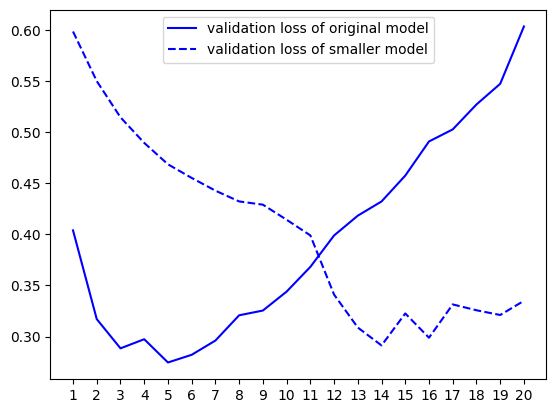

In [11]:
import matplotlib.pyplot as plt

val_original_loss = history_original.history['val_loss']
val_smaller_loss =  history_smaller.history['val_loss']
epochs = range(1, len(val_original_loss)+1)


plt.plot(epochs, val_original_loss, 'b-', label = 'validation loss of original model')
plt.plot(epochs, val_smaller_loss, 'b--', label = 'validation loss of smaller model')

plt.xticks(epochs)
plt.legend()
plt.show()

작은 모델이 기본 모델보다 저 나중에 과대적합되기 시작함(4번째가 아니라 14번째 에포크에서). 과대적합이 시작되었을 때 성능이 더 천천히 감소됨.

이번에는 더 큰 모델로 만들어 보자  
학습 대상에 대해 과도하게 많은 파라미터를 가진 모델을 만드는 것이 표준이지만 기억 용량이 너무 많을 수 있음.  
모델이 바로 과대적합되고 검증 손실 곡선이 고르지 않고 분산이 크다면 모델이 너무 큰 것임(검증 지표가 고르지 않다는 것은 신뢰할 수 있는 검증 과정을 사용하지 않는다는 징후일 수 있음. 예를 들어 검증 세트가 너무 작은 경우)

In [13]:
model = keras.Sequential([
    layers.Dense(512, activation = "relu"),
    layers.Dense(512, activation = "relu"),
    layers.Dense(1, activation = "sigmoid"),
])

model.compile(
    optimizer = "rmsprop",
    loss = "binary_crossentropy",
    metrics = ['accuracy']
)

history_larger = model.fit(train_data, train_labels, epochs = 20, batch_size = 512, validation_split = .4)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 382ms/step - accuracy: 0.6363 - loss: 0.6453 - val_accuracy: 0.8514 - val_loss: 0.3729
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 327ms/step - accuracy: 0.8573 - loss: 0.3423 - val_accuracy: 0.8785 - val_loss: 0.2865
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 338ms/step - accuracy: 0.9007 - loss: 0.2438 - val_accuracy: 0.8744 - val_loss: 0.3007
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 355ms/step - accuracy: 0.9190 - loss: 0.2003 - val_accuracy: 0.8872 - val_loss: 0.2708
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 313ms/step - accuracy: 0.9631 - loss: 0.1157 - val_accuracy: 0.8862 - val_loss: 0.2763
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 359ms/step - accuracy: 0.9795 - loss: 0.0774 - val_accuracy: 0.8851 - val_loss: 0.3429
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 363ms/step - accuracy: 0.9687 - loss: 0.0887 - val_accuracy: 0.8862 - val_loss: 0.3740
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 295ms/step - accuracy: 0.9800 - loss: 0.0718 - val_accu

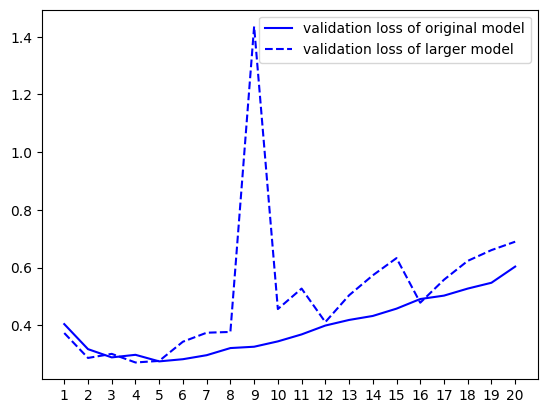

In [16]:
val_original_loss = history_original.history['val_loss']
val_larger_loss =  history_larger.history['val_loss']
epochs = range(1, len(val_original_loss)+1)


plt.plot(epochs, val_original_loss, 'b-', label = 'validation loss of original model')
plt.plot(epochs, val_larger_loss, 'b--', label = 'validation loss of larger model')

plt.xticks(epochs)
plt.legend()
plt.show()

용량이 큰 모델은 첫 번째 에포크 이후 거의 바로 과대적합이 시작되어 갈수록 더 심해지고, 검증 손실도 매우 불안정함.

# 가중치 규제 weight regularization

In [19]:
train_labels.shape

(25000,)

In [21]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer = regularizers.l2(0.002),
                 activation = "relu"),
    layers.Dense(16,
                 kernel_regularizer = regularizers.l2(0.002),
                 activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

model.compile(
    optimizer = "rmsprop",
    loss = "binary_crossentropy",
    metrics = ['accuracy']
)

history_l2_reg = model.fit(
    train_data, train_labels,
    epochs = 20, batch_size = 512, validation_split = .4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.7044 - loss: 0.6861 - val_accuracy: 0.8724 - val_loss: 0.4754
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8893 - loss: 0.4297 - val_accuracy: 0.8725 - val_loss: 0.4107
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9134 - loss: 0.3396 - val_accuracy: 0.8759 - val_loss: 0.3844
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9255 - loss: 0.2980 - val_accuracy: 0.8914 - val_loss: 0.3533
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9415 - loss: 0.2639 - val_accuracy: 0.8768 - val_loss: 0.3796
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.9424 - loss: 0.2515 - val_accuracy: 0.8555 - val_loss: 0.4313
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9462 - loss: 0.2473 - val_accuracy: 0.8806 - val_loss: 0.3723
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9536 - loss: 0.2304 - val_accuracy: 0.8837 - v

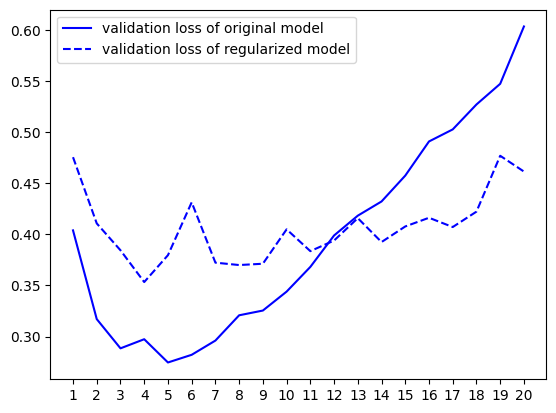

In [22]:
val_original_loss = history_original.history['val_loss']
val_reg_loss =  history_l2_reg.history['val_loss']
epochs = range(1, len(val_original_loss)+1)

plt.plot(epochs, val_original_loss, 'b-', label = 'validation loss of original model')
plt.plot(epochs, val_reg_loss, 'b--', label = 'validation loss of regularized model')

plt.xticks(epochs)
plt.legend()
plt.show()

두 모델이 동일한 파라미터 개수를 가지고 있어도 L2규제를 사용한 모델이 기본 모델보다 훨씬 더 과대적합에 잘 견디고 있음을 알 수 있다.

# 드롭아웃 dropout

In [23]:
model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation = "relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation = "sigmoid"),
])

model.compile(
    optimizer = "rmsprop",
    loss = "binary_crossentropy",
    metrics = ['accuracy']
)

history_dropout = model.fit(
    train_data, train_labels,
    epochs = 20, batch_size = 512, validation_split = .4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.5730 - loss: 0.6710 - val_accuracy: 0.8451 - val_loss: 0.5542
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7448 - loss: 0.5485 - val_accuracy: 0.8672 - val_loss: 0.4300
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8085 - loss: 0.4557 - val_accuracy: 0.8808 - val_loss: 0.3508
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8476 - loss: 0.3914 - val_accuracy: 0.8816 - val_loss: 0.3191
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8717 - loss: 0.3380 - val_accuracy: 0.8899 - val_loss: 0.2872
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8994 - loss: 0.2942 - val_accuracy: 0.8880 - val_loss: 0.2802
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9084 - loss: 0.2598 - val_accuracy: 0.8919 - val_loss: 0.2739
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9186 - loss: 0.2356 - val_accuracy: 0.8839 - v

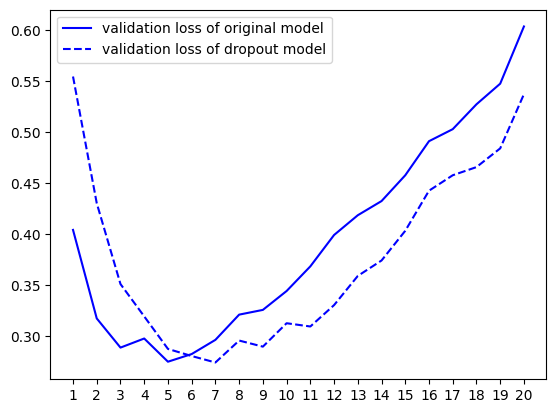

In [26]:
val_original_loss = history_original.history['val_loss']
val_dropout_loss =  history_dropout.history['val_loss']
epochs = range(1, len(val_original_loss)+1)

plt.plot(epochs, val_original_loss, 'b-', label = 'validation loss of original model')
plt.plot(epochs, val_dropout_loss, 'b--', label = 'validation loss of dropout model')

plt.xticks(epochs)
plt.legend()
plt.show()

기본 모델보다 확실히 향상됨.